Before we dive into understanding the relevant science behind the learning process, let’s ground ourselves in a definition of learning that is drawn from research.

Learning is a process that:

- Is active - process of engaging and manipulating objects, experiences, and conversations in order to build mental models of the world (Dewey, 1938; Piaget, 1964; Vygotsky, 1986). Learners build knowledge as they explore the world around them, observe and interact with phenomena, converse and engage with others, and make connections between new ideas and prior understandings.

- Builds on prior knowledge - and involves enriching, building on, and changing existing understanding, where “one’s knowledge base is a scaffold that supports the construction of all future learning” (Alexander, 1996, p. 89).  

- Occurs in a complex social environment - and thus should not be limited to being examined or perceived as something that happens on an individual level. Instead, it is necessary to think of learning as a social activity involving people, the things they use, the words they speak, the cultural context they’re in, and the actions they take (Bransford, et al., 2006; Rogoff, 1998), and that knowledge is built by members in the activity (Scardamalia & Bereiter, 2006).

- Is situated in an authentic context - provides learners with the opportunity to engage with specific ideas and concepts on a need-to-know or want-to-know basis (Greeno, 2006; Kolodner, 2006).

- Requires learners’ motivation and cognitive engagement to be sustained when learning complex ideas, because considerable mental effort and persistence are necessary.

The conditions for inputs to learning are clear, but the process is incomplete without making sense of what outputs constitute learning has taken place. At the core, learning is a process that results in a change in knowledge or behavior as a result of experience. Understanding what it takes to get that knowledge in and out (or promote behavioral change of a specific kind) can help optimize learning.

**How did COVID-19 impact education, and more specifically Digital Education!**


The COVID-19 pandemic has created the largest disruption of education systems in human history, affecting nearly 1.6 billion learners in more than 200 countries. Closures of schools, institutions and other learning spaces have impacted more than 94% of the world’s student population. This has brought far-reaching changes in all aspects of our lives. Social distancing and restrictive movement policies have significantly disturbed traditional educational practices. Reopening of schools after relaxation of restriction is another challenge with many new standard operating procedures put in place.

Within a short span of the COVID-19 pandemic, many researchers have shared their works on teaching and learning in different ways. Several schools, colleges and universities have discontinued face-to-face teachings. There is a fear of losing 2020 academic year or even more in the coming future. The need of the hour is to innovate and implement alternative educational system and assessment strategies. The COVID-19 pandemic has provided us with an opportunity to pave the way for introducing digital learning. This kernel aims to provide a comprehensive report on the impact of the COVID-19 pandemic on online teaching and learning of various papers and indicate the way forward.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import gc
import glob

from tqdm.notebook import tqdm
tqdm.pandas()

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 
import plotly.graph_objs as go

from plotnine import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from plotly import tools
import re
from plotly.offline import init_notebook_mode, plot, iplot
from wordcloud import WordCloud, STOPWORDS 
from warnings import filterwarnings
filterwarnings('ignore')
import missingno as msno
import glob

%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-in-usa/us_states_covid19_daily.csv
/kaggle/input/covid19-in-usa/us_counties_covid19_daily.csv
/kaggle/input/covid19-in-usa/us_covid19_daily.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/README.md
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/6345.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/9812.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/2339.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5404.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5150.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/1624.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagem

## The Basic File descriptions

In [2]:
df2 = pd.read_csv("/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv", low_memory=False)
print(df2.shape)
df2.head().style.set_properties(**{'background-color':'white?',
                                     'color': 'black'})

(372, 6)


,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Simulations"
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


### Data description for products_info file


- LP ID - The unique identifier of the product

- URL - Web Link to the specific product

- Product Name - Name of the specific product

- Provider/Company Name - Name of the product provider

- Sector(s) - Sector of education where the product is used

- Primary Essential Function - The basic function of the product. There are two layers of labels here. Products are first labeled as one of these three categories: LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District Operations. Each of these categories have multiple sub-categories with which the products were labeled

In [3]:
df1 = pd.read_csv("/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv", low_memory=False)
print(df1.shape)
df1.head().style.set_properties(**{'background-color':'white?',
                                     'color': 'black'})

(233, 7)


,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,nan,nan,nan,nan,nan,nan
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,nan,nan,nan,nan,nan,nan
4,2238,nan,nan,nan,nan,nan,nan


### Data description for districts_info file
- district_id - The unique identifier of the school district

- state - The state where the district resides in

- locale - NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural. See Locale Boundaries User's Manual for more information.

- pct_black/hispanic - Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data

- pct_free/reduced - Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data

- countyconnectionsratio - ratio (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on the county level data from FCC From 477 (December 2018 version). See FCC data for more information.

- pptotalraw - Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD$) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district.

In [4]:
df = pd.read_csv("/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5802.csv", low_memory=False)
print(df.shape)
df.head().style.set_properties(**{'background-color':'white?',
                                     'color': 'black'})

(41428, 4)


,time,lp_id,pct_access,engagement_index
0,2020-01-01,92871,0.170000,5.870000
1,2020-01-01,32213,0.340000,36.040000
2,2020-01-01,13496,0.170000,2.510000
3,2020-01-01,99916,0.080000,0.840000
4,2020-01-01,16164,0.080000,3.350000


### Data description for engagement_file

- time - date in "YYYY-MM-DD"

- lp_id - The unique identifier of the product

- pct_access - Percentage of students in the district have at least one page-load event of a given product and on a given day

- engagement_index - Total page-load events per one thousand students of a given product and on a given day

In [5]:
input_dir = "../input/learnplatform-covid19-impact-on-digital-learning"
districts_df = pd.read_csv(os.path.join(input_dir, "districts_info.csv"))
districts_df.shape

(233, 7)

## The Basic Data distributions

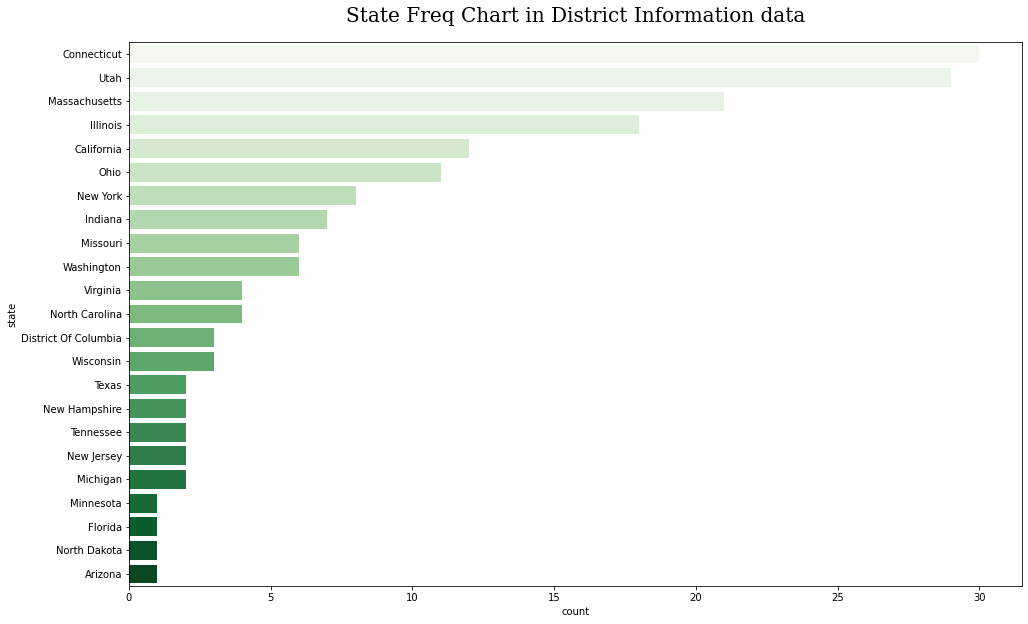

In [6]:
plt.figure(figsize=(16, 10))
sns.countplot(y="state",data=districts_df,order=districts_df.state.value_counts().index,palette="Greens",linewidth=3)
plt.title("State Freq Chart in District Information data",font="Serif", size=20,pad=20)
plt.show()

district_df = districts_df
states = district_df.groupby(by ='state').count()[['district_id']]
#abbreviations of all the US States
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

codes = []
for i in states.index:
    codes.append(us_state_abbrev[i])
# print(codes)
data = dict(
        type = 'choropleth',
        colorscale = 'greens',
        locations = codes,
        locationmode = 'USA-states',
        z = list(states['district_id']),
        text = states.index,
        colorbar = {'title':'States'},
      )
layout = dict(title = 'States',
              geo = dict(projection = {'type':'mercator'})
             )
layout = dict(title= 'States with most districts mentioned',
              geo = {'scope':'usa'})

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)


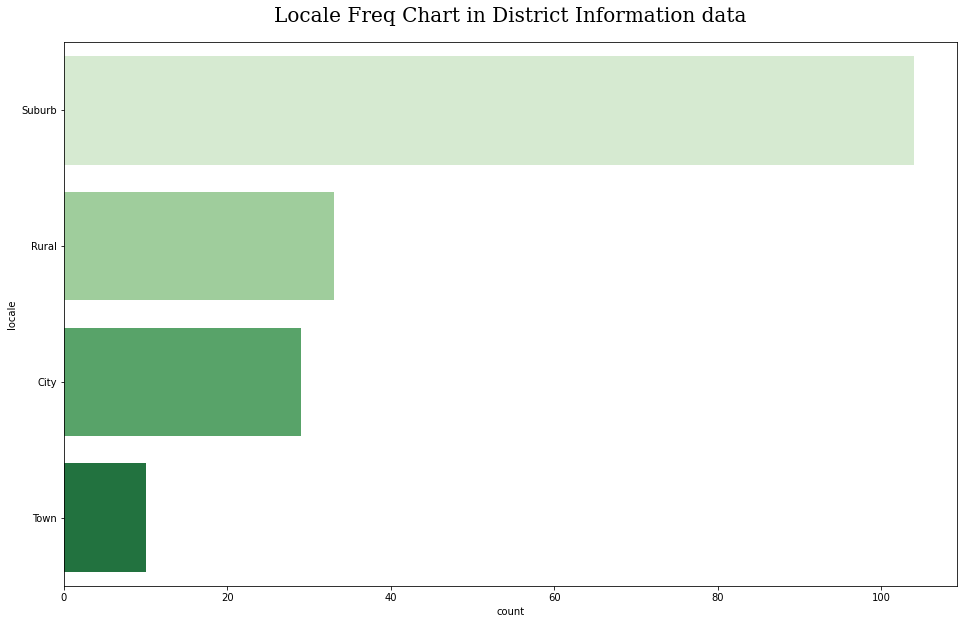

In [7]:
plt.figure(figsize=(16, 10))
sns.countplot(y="locale",data=districts_df,order=districts_df.locale.value_counts().index,palette="Greens",linewidth=3)
plt.title("Locale Freq Chart in District Information data",font="Serif", size=20,pad=20)
plt.show()

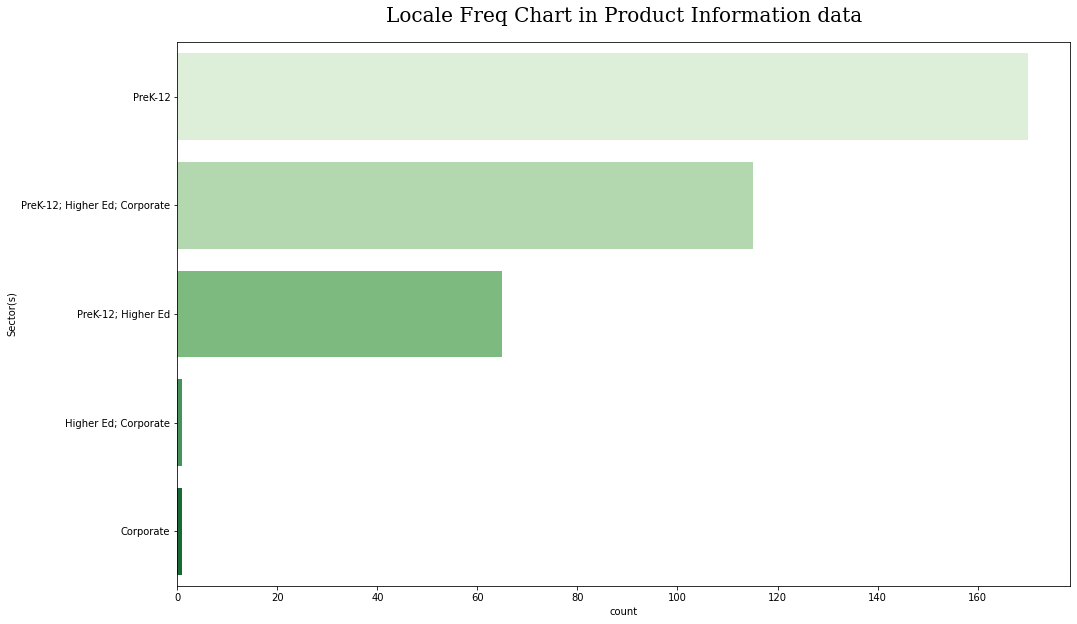

In [8]:
# df2.head()
plt.figure(figsize=(16, 10))
sns.countplot(y="Sector(s)",data=df2,order=df2["Sector(s)"].value_counts().index,palette="Greens",linewidth=3)
plt.title("Locale Freq Chart in Product Information data",font="Serif", size=20,pad=20)
plt.show()

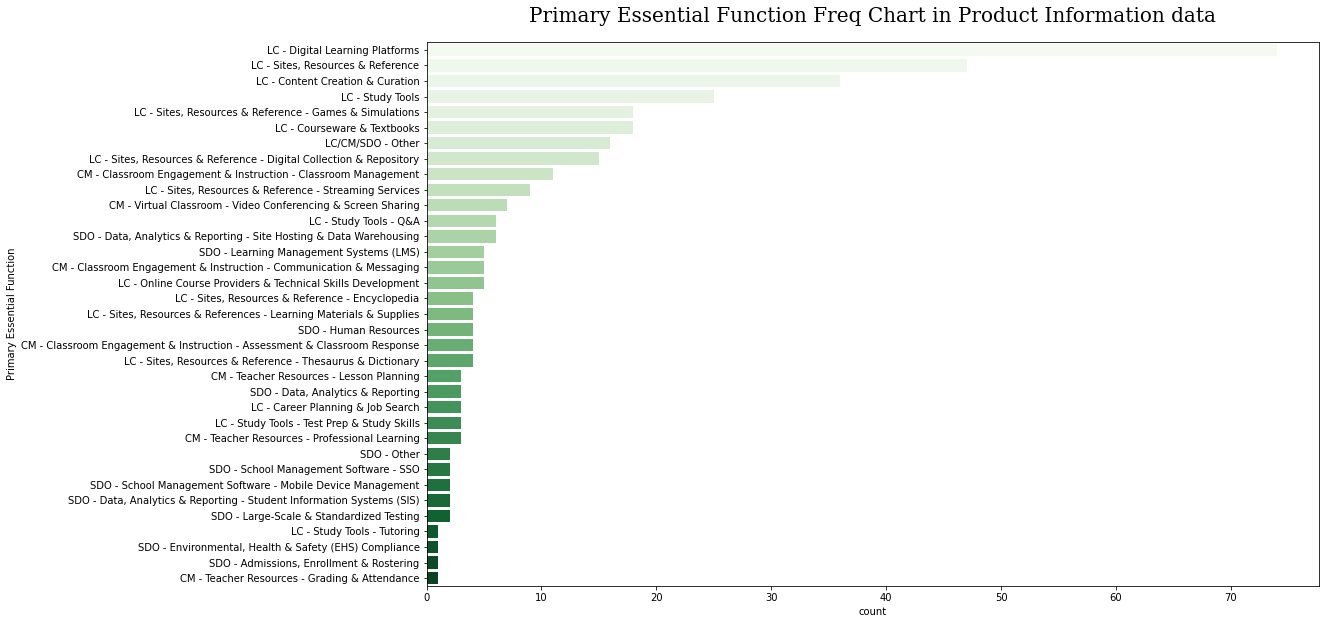

In [9]:
# df2.head()
plt.figure(figsize=(16, 10))
sns.countplot(y="Primary Essential Function",data=df2,order=df2["Primary Essential Function"].value_counts().index,palette="Greens",linewidth=3)
plt.title("Primary Essential Function Freq Chart in Product Information data",font="Serif", size=20,pad=20)
plt.show()


## Checking the missing values 

In [10]:
products_df = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/products_info.csv")
products_df.head()
districts_df = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv")
districts_df.head()
path = '../input/learnplatform-covid19-impact-on-digital-learning/engagement_data' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    district_id = filename.split("/")[4].split(".")[0]
    df["district_id"] = district_id
    li.append(df)
    
engagement_df = pd.concat(li)
engagement_df = engagement_df.reset_index(drop=True)
# engagement_df.head()

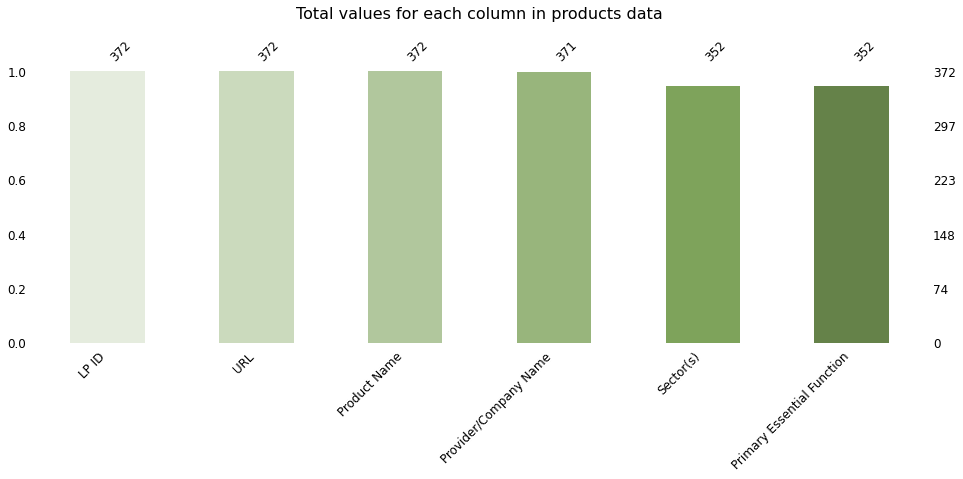

In [11]:
col_list = ['#e5ecde','#cbdabd','#b1c79d','#98b57c','#7ea35b','#658249']
msno.bar(products_df, figsize=(16,5), fontsize=12,color=col_list)
plt.title('Total values for each column in products data',fontsize =16,pad=20)
plt.show()

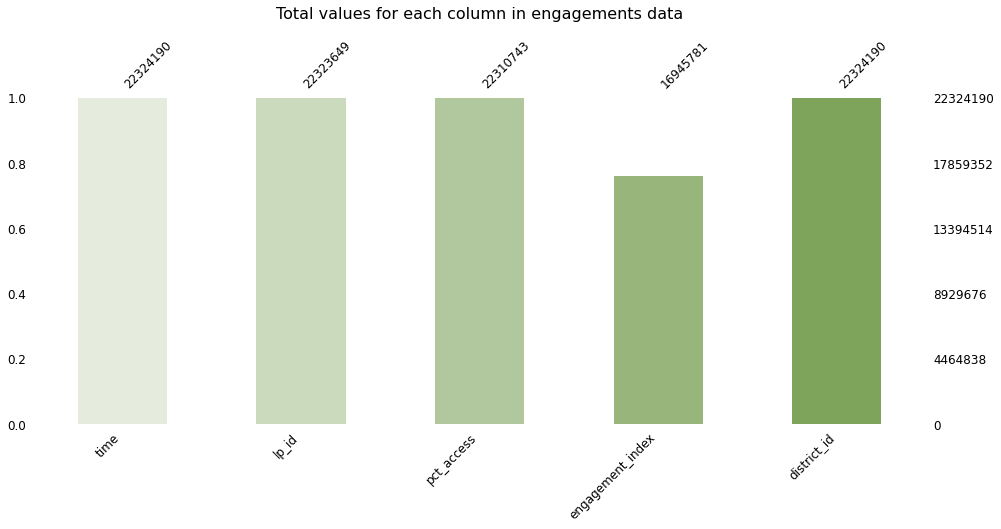

In [12]:
msno.bar(engagement_df, figsize=(16,6), fontsize=12,color=col_list)
plt.title('Total values for each column in engagements data',fontsize =16,pad=20)
plt.show()

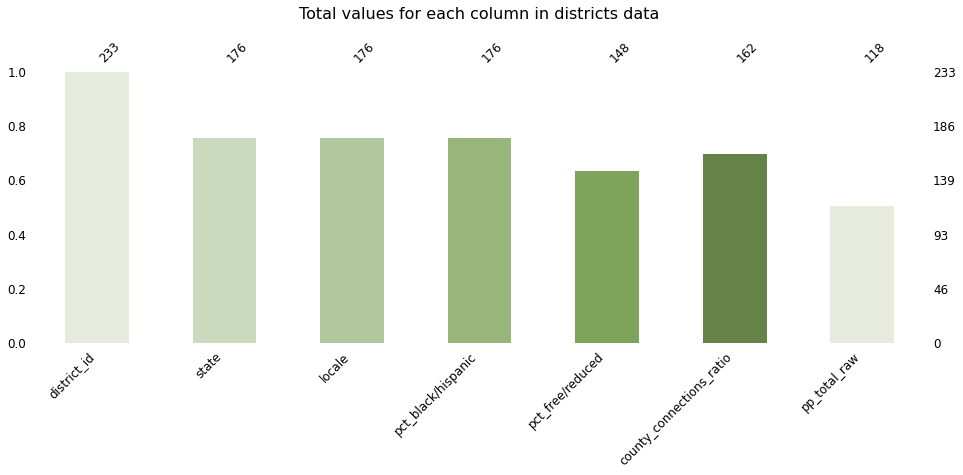

In [13]:
msno.bar(districts_df, figsize=(16,5), fontsize=12,color=col_list)
plt.title('Total values for each column in districts data',fontsize =16,pad=20)
plt.show()

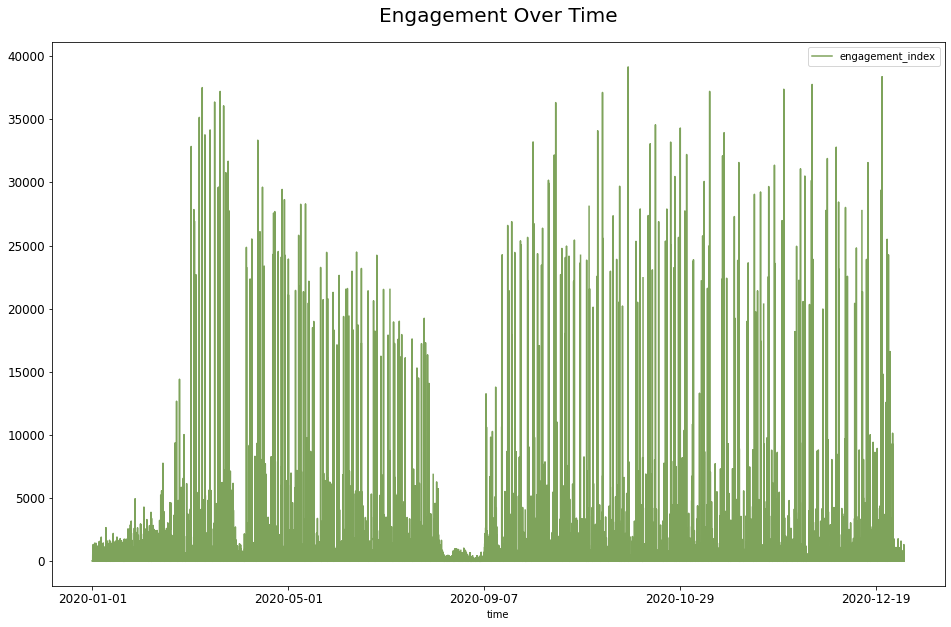

In [14]:
df[['time', 'engagement_index']].set_index(['time']).plot(figsize = (16, 10),color='#7ea35b',grid=False, fontsize =12)
plt.title('Engagement Over Time',pad=20,fontsize=20)
plt.show()

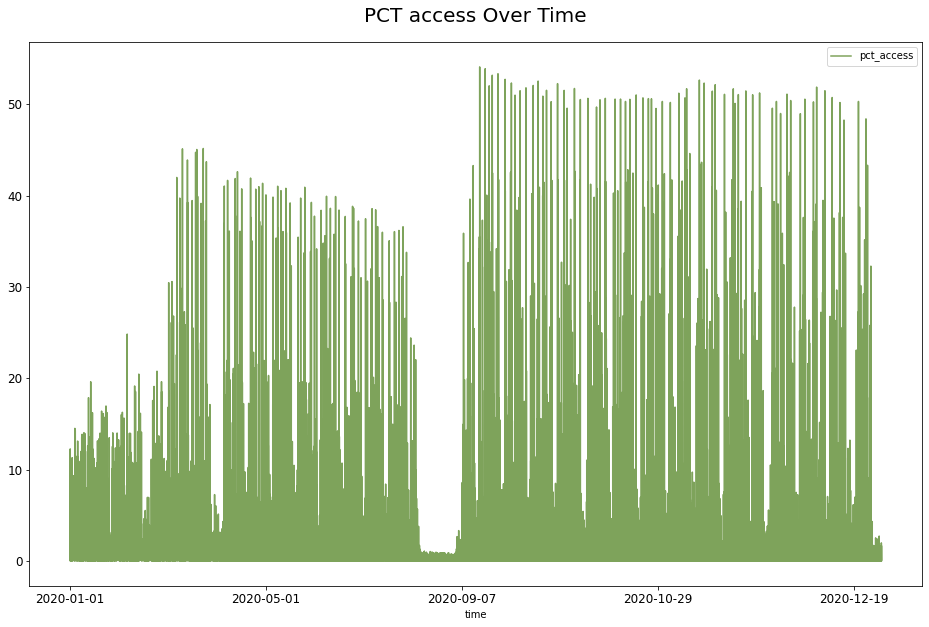

In [15]:
df[['time', 'pct_access']].set_index(['time']).plot(figsize = (16, 10),color='#7ea35b',grid=False, fontsize =12)#,title = )
plt.title('PCT access Over Time',pad=20,fontsize=20)
plt.show()

## Basic Word Clouds

(-0.5, 1439.5, 1079.5, -0.5)

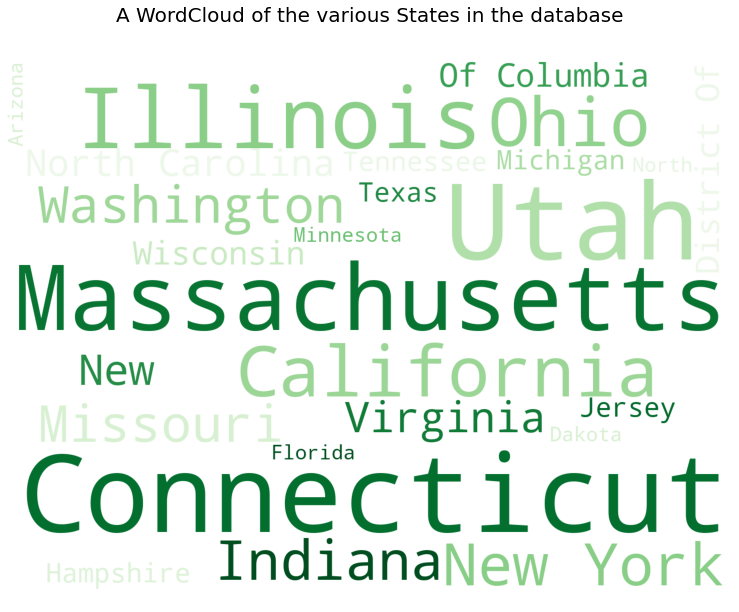

In [16]:
cloud = WordCloud(width=1440, height=1080,stopwords={'nan'},colormap='Greens',background_color='white').generate(" ".join(districts_df['state'].astype(str)))
plt.figure(figsize=(16, 10))
plt.title('A WordCloud of the various States in the database',fontsize=20,pad=40)
plt.imshow(cloud)
plt.axis('off')

(-0.5, 1439.5, 1079.5, -0.5)

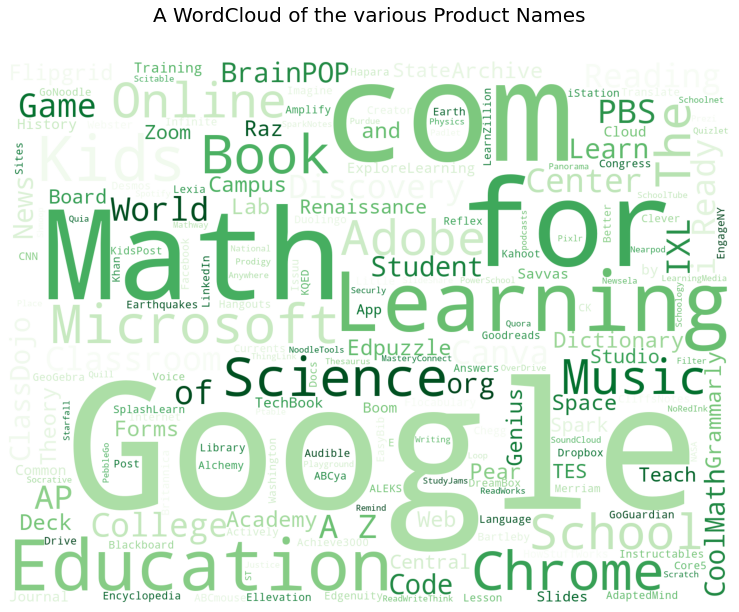

In [17]:
cloud = WordCloud(width=1440, height=1080,stopwords={'nan'},colormap='Greens',background_color='white').generate(" ".join(products_df['Product Name'].astype(str)))
plt.figure(figsize=(16, 10))
plt.title('A WordCloud of the various Product Names',fontsize=20,pad=40)
plt.imshow(cloud)
plt.axis('off')

(-0.5, 1439.5, 1079.5, -0.5)

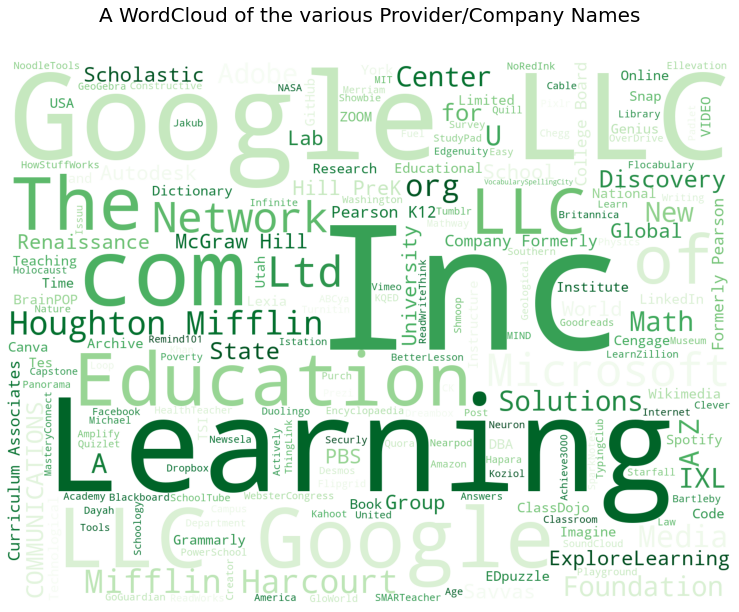

In [18]:
cloud = WordCloud(width=1440, height=1080,stopwords={'nan'},colormap='Greens',background_color='white').generate(" ".join(products_df['Provider/Company Name'].astype(str)))
plt.figure(figsize=(16, 10))
plt.title('A WordCloud of the various Provider/Company Names',fontsize=20,pad=40)
plt.imshow(cloud)
plt.axis('off')

## Let's also bring in some Covid-19 data! 


Let's add some visualizations for the cases as well! Since this is impact of Covid-19 on Digital learning, we should also have a look at Covid-19 spread and trends, then we can try and find some patterns for it with Digital Learning during the time! 

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

pd.options.mode.chained_assignment = None

# Read the data
us_data_path = "/kaggle/input/covid19-in-usa/"
us_df = pd.read_csv(us_data_path + "us_covid19_daily.csv")
us_states_df = pd.read_csv(us_data_path + "us_states_covid19_daily.csv")
us_df["date"] = pd.to_datetime(us_df["date"], format="%Y%m%d")
us_states_df = us_states_df.reindex(index=us_states_df.index[::-1])
us_states_df["date"] = pd.to_datetime(us_states_df["date"], format="%Y%m%d").dt.date.astype(str)
#us_states_df.head()

# US state code to name mapping
state_map_dict = {'AL': 'Alabama',
 'AK': 'Alaska',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'DC': 'District of Columbia',
 'D.C.': 'District of Columbia',
 'FM': 'Federated States of Micronesia',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MH': 'Marshall Islands',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'MP': 'Northern Mariana Islands',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PW': 'Palau',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VI': 'Virgin Islands',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming'}

state_code_dict = {v:k for k, v in state_map_dict.items()}
state_code_dict["Chicago"] = 'Illinois'

def correct_state_names(x):
    try:
        return state_map_dict[x.split(",")[-1].strip()]
    except:
        return x.strip()
    
def get_state_codes(x):
    try:
        return state_code_dict[x]
    except:
        return "Others"

covid_19_df = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")
us_covid_df = covid_19_df[covid_19_df["Country/Region"]=="US"]
us_covid_df["Province/State"] = us_covid_df["Province/State"].apply(correct_state_names)
us_covid_df["StateCode"] = us_covid_df["Province/State"].apply(lambda x: get_state_codes(x))

cumulative_df = us_covid_df.groupby("ObservationDate")["Confirmed", "Deaths", "Recovered"].sum().reset_index()
cumulative_df['ObservationDate_1'] = pd.to_datetime(cumulative_df['ObservationDate'], dayfirst = False)
cumulative_df = cumulative_df.sort_values(by=['ObservationDate_1'],axis=0)
# cumulative_df['month'] = pd.DatetimeIndex(cumulative_df['ObservationDate_1'])
cumulative_df['month'] = pd.to_datetime(cumulative_df['ObservationDate_1'],format='%m%Y', errors='coerce').dt.to_period('m')

In [20]:
cumulative_df = cumulative_df.head(345)

[Text(0.5, 1.0, 'Covid-19 cases in the year 2020')]

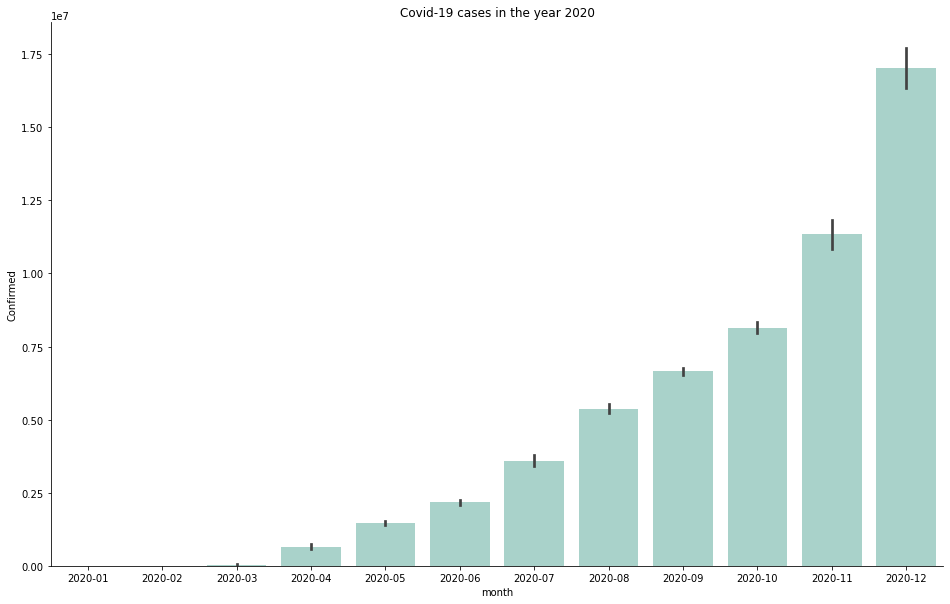

In [21]:
f, ax = plt.subplots(figsize=(16, 10))
sns.despine(f)
sns.barplot(x='month', y='Confirmed', data=cumulative_df,color='#A2D9CE').set(title='Covid-19 cases in the year 2020')

[Text(0.5, 1.0, 'Covid-19 deaths in the year 2020')]

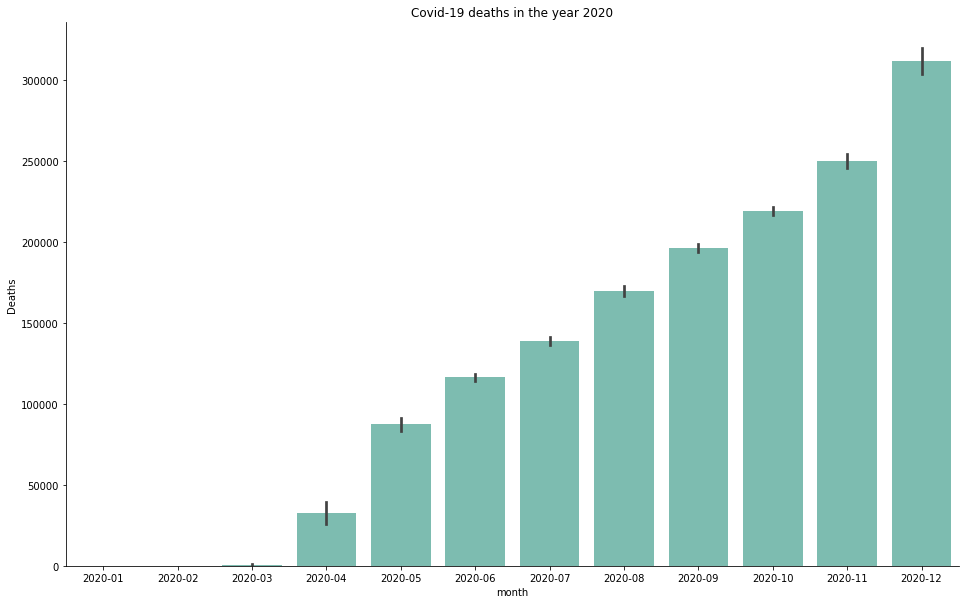

In [22]:
f, ax = plt.subplots(figsize=(16, 10))
sns.despine(f)
sns.barplot(x='month', y='Deaths', data=cumulative_df,color='#73C6B6').set(title='Covid-19 deaths in the year 2020')

[Text(0.5, 1.0, 'Covid-19 recoveries in the year 2020')]

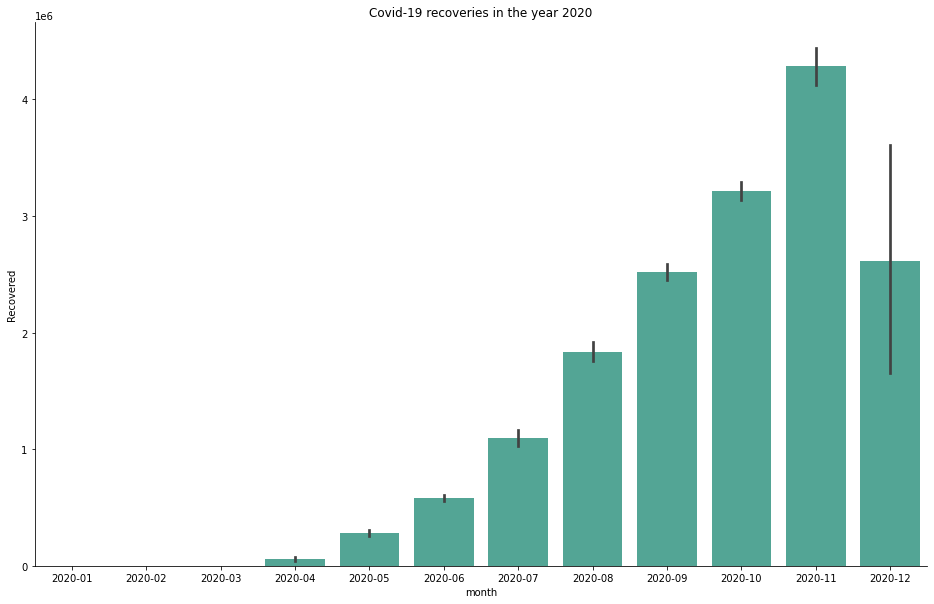

In [23]:
f, ax = plt.subplots(figsize=(16, 10))
sns.despine(f)
sns.barplot(x='month', y='Recovered', data=cumulative_df,color='#45B39D').set(title='Covid-19 recoveries in the year 2020')

In [24]:
%%html
<marquee style='width: 90% ;height:70%; color: #45B39D ;'>
    <b>Do UPVOTE if you like my work, I will be adding some more content to this kernel :) </b></marquee>

**If there are any suggesion for the notebook please comment, that would be helpful and I will try to implement your suggestions! :)?**
Some of my other works:

- [TPS-APR-21 EDA AND MODEL](https://www.kaggle.com/udbhavpangotra/tps-apr21-eda-model)

- [Heart Attacks Extensive EDA and Visualizations](https://www.kaggle.com/udbhavpangotra/heart-attacks-extensive-eda-and-visualizations)

- [WHAT ARE PEOPLE WATCHING IN GREAT BIRTAIN](https://www.kaggle.com/udbhavpangotra/what-do-people-use-youtube-for-in-great-britain)
